## Contract Price Automation Models

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context('paper', font_scale=1.0)
%matplotlib inline

In [2]:
#Importing libraries for machine learning prep and eval
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn import tree, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

In [3]:
#Importing Decision Tress libraries
from sklearn.tree import DecisionTreeRegressor

In [4]:
#Importing Random Forest 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [5]:
#Import for Gradient Boosting Regressor 
from sklearn.ensemble import GradientBoostingRegressor

In [6]:
#Import for Ensemble (Stacking)
from numpy import mean
from numpy import std
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import StackingRegressor
from sklearn.svm import SVR
from matplotlib import pyplot

In [7]:
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import RANSACRegressor

In [8]:
from sklearn.svm import SVR

In [9]:
from sklearn.neighbors import KNeighborsRegressor

### Data Preparation for Machine Learning

In [10]:
data_df = pd.read_csv('.csv')

In [11]:
data_df.dtypes

Unnamed: 0                           int64
Client                              object
Year                                 int64
Project_Title                       object
Contract_Amount                    float64
                                    ...   
Project_Type_Theater                 int64
Project_Type_Utilities Audit         int64
Project_Type_Utility Masterplan      int64
Project_Type_Wall                    int64
Project_Type_Warehouse               int64
Length: 88, dtype: object

In [12]:
target = data_df.Contract_Amount
features = data_df.drop(['Unnamed: 0', 'Amount_VAT_EX','Contract_Amount','Project_Title','Year', 'Client','Price per sqm'], axis=1)
target.shape, features.shape

((418,), (418, 81))

In [13]:
target_train, target_test, features_train, features_test = train_test_split(target, features, test_size = 0.30, random_state= 4)
print(target_test.shape, features_test.shape, target_train.shape, features_train.shape)

(126,) (126, 81) (292,) (292, 81)


In [34]:
#Function for model evaluation
def evaluate(model, features_test, target_test):
    predictions = model.predict(features_test)
    errors= abs(predictions - target_test)
    mape = 100*((errors/target_test).mean(axis=0))
    print('Model Performance')
    print('r2: {:0.4f}'.format(r2_score(target_test, predictions)))
    print(('Mean Absolute Error: %.2f')%(mean_absolute_error(target_test, predictions)))
    print(('Mean Square Error: %.2f')%(mean_squared_error(target_test, predictions)))
    print(('Mean Average Percentage Error: %.2f')%(mape))
    plt.scatter(target_test, predictions)
    return 

### Data Scaling

Used for algorithms that depend on the distances between data: huber, gradient boosting, regressor, knn, and ensemble

In [16]:
scaler= StandardScaler()
features_train_sc = scaler.fit_transform(features_train)
features_test_sc = scaler.fit_transform(features_test)

### Huber Regressor 

In [49]:
hr_model= HuberRegressor()
target_train_sc =target_train_sc.ravel()
hr_model.fit(features_train_sc, target_train)

HuberRegressor()

Model Performance
r2: 0.4509
Mean Absolute Error: 447631.76
Mean Square Error: 650757905758.09
Mean Average Percentage Error: 90.72


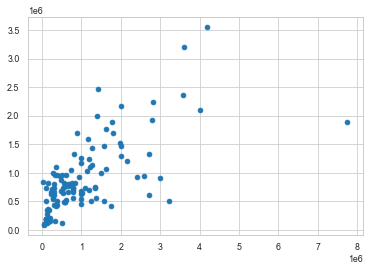

In [50]:
evaluate(hr_model, features_test_sc, target_test)

### Decision Tree 

In [51]:
dt_model = DecisionTreeRegressor(random_state=4)
dt_model.fit(features_train,target_train)

DecisionTreeRegressor(random_state=4)

Model Performance
r2: 0.5382
Mean Absolute Error: 469696.16
Mean Square Error: 547306245887.38
Mean Average Percentage Error: 83.94


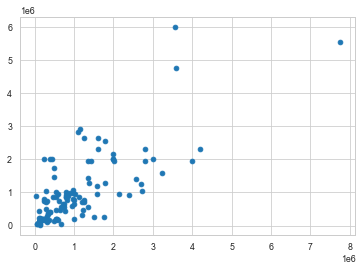

In [52]:
evaluate(dt_model, features_test, target_test)

### Random Forest 

In [53]:
rf_model = RandomForestRegressor(n_estimators= 500, random_state=4)
pricing_model = rf_model.fit(features_train,target_train)

Model Performance
r2: 0.6486
Mean Absolute Error: 382064.55
Mean Square Error: 416419800703.85
Mean Average Percentage Error: 78.81


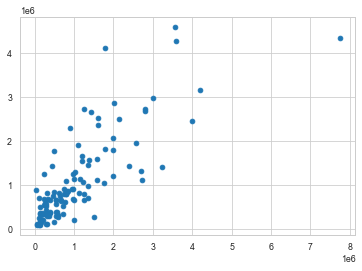

In [54]:
evaluate(rf_model, features_test, target_test)

**Tuning the random forest regressor**

In [40]:
print(rf_model.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 4, 'verbose': 0, 'warm_start': False}


In [41]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [42]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator=rf, param_distributions = random_grid,
                              n_iter = 100, cv= 3, verbose=2, random_state=4, n_jobs=-1)
rf_random.fit(features_train, target_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.7min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=4, verbose=2)

In [43]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 110,
 'bootstrap': True}

Model Performance
r2: 0.6290
Mean Absolute Error: 399611.53
Mean Square Error: 439703438512.57
Mean Average Percentage Error: 79.77


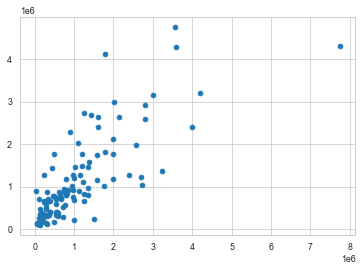

In [44]:
base_model = RandomForestRegressor(n_estimators = 100, random_state = 4)
base_model.fit(features_train, target_train)
evaluate(base_model, features_test, target_test)

### Gradient Boosting Regressor 

In [55]:
gbr_model= GradientBoostingRegressor(n_estimators=1000, random_state=4, learning_rate=0.1, loss='ls',max_depth=1)
gbr_model.fit(features_train_sc, target_train)

GradientBoostingRegressor(max_depth=1, n_estimators=1000, random_state=4)

Model Performance
r2: 0.4380
Mean Absolute Error: 569679.19
Mean Square Error: 666028275237.99
Mean Average Percentage Error: 149.84


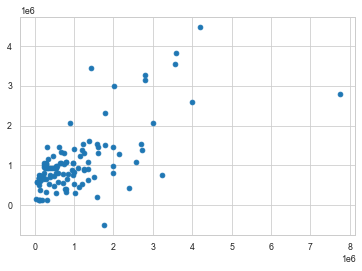

In [56]:
evaluate(gbr_model, features_test_sc, target_test)

### Ensemble Regression (Stacking)

In [57]:
#stacking ensemble of models
def get_stacking():
    #define base models
    level0 =list()
    level0.append(('knn', KNeighborsRegressor()))
    level0.append(('dtr', DecisionTreeRegressor()))
    level0.append(('svr', SVR()))
    level0.append(('ridge', RidgeCV()))
    level1 = LinearRegression()
    model= StackingRegressor(estimators= level0, final_estimator=level1,cv=3)
    return model

In [58]:
#List of models
def get_models():
    models= dict()
    models['knn']= KNeighborsRegressor()
    models['dtr']= DecisionTreeRegressor()
    models['svr']= SVR()
    models['ridge'] = RidgeCV()
    models['stacking']= get_stacking()
    return models

In [59]:
#Evaluate the models 
def evaluate_model(model, features, target):
    cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state=1)
    scores = cross_val_score(model, features,target, scoring= 'neg_mean_absolute_error', cv=cv, n_jobs= -1, error_score = 'raise')
    return scores

In [60]:
X= features_train_sc
y= target_train
models = get_models()

>knn -683539.269 (153131.300)
>dtr -537675.650 (156424.642)
>svr -783061.935 (245131.368)
>ridge -652936.992 (188387.877)
>stacking -544347.021 (136554.169)


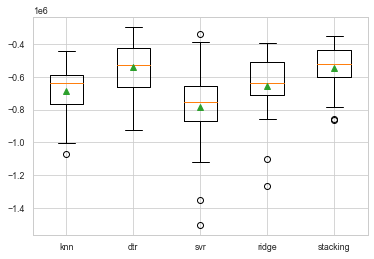

In [61]:
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)'%(name,mean(scores),std(scores)))

pyplot.boxplot(results, labels = names, showmeans = True)
pyplot.show()

In [62]:
model.fit(features_train_sc, target_train)

StackingRegressor(cv=3,
                  estimators=[('knn', KNeighborsRegressor()),
                              ('dtr', DecisionTreeRegressor()), ('svr', SVR()),
                              ('ridge',
                               RidgeCV(alphas=array([ 0.1,  1. , 10. ])))],
                  final_estimator=LinearRegression())

r2: 0.50
mean absolute error: 482491.52
mean square error: 597914136894.49
Mean Average Percentage Error: 95.99


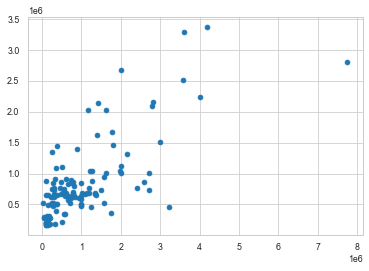

In [64]:
#Evaluate the performance of the model
stacking_pred = model.predict(features_test_sc)
r2 = r2_score(target_test, stacking_pred)
mae = mean_absolute_error(target_test, stacking_pred)
mse = mean_squared_error(target_test, stacking_pred)
errors = abs(stacking_pred - target_test)
mape = 100*((errors/target_test).mean(axis=0))
print(('r2: %.2f')%r2)  
print(('mean absolute error: %.2f')%mae)  
print(('mean square error: %.2f')%mse)
print(('Mean Average Percentage Error: %.2f')%mape)
plt.scatter(target_test, stacking_pred)

### Support Vector Machine

In [95]:
svr_model = SVR()
target_train_sc = target_train_sc.ravel()
svr_model.fit(features_train_sc, target_train)

SVR()

Model Performance
r2: -0.1029
Mean Absolute Error: 700437.29
Mean Square Error: 1306988520023.95
Mean Average Percentage Error: 155.19


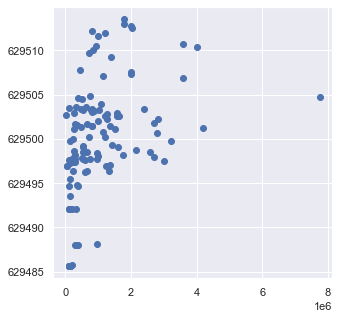

In [97]:
evaluate(svr_model, features_test_sc, target_test)

### K Nearest Neighbor Regressor

In [67]:
rmse_val = [] #rmse will be stored here for all k considered 
for K in range(20):
    K += 1
    reg = KNeighborsRegressor(n_neighbors = K)
    
    reg.fit(features_train_sc, target_train)
    pred = reg.predict(features_test_sc)
    error = math.sqrt(mean_squared_error(target_test,pred))
    rmse_val.append(error)
    print('RMSE value for k=',K, 'is:', error, 'r2:', (r2_score(target_test, pred)))

RMSE value for k= 1 is: 1257675.2687865854 r2: -0.33473576993134424
RMSE value for k= 2 is: 1093415.770188074 r2: -0.008855403074179646
RMSE value for k= 3 is: 1041679.1711225407 r2: 0.08435691872422879
RMSE value for k= 4 is: 936946.0937110885 r2: 0.2592230381893198
RMSE value for k= 5 is: 932849.8809510574 r2: 0.2656860505141102
RMSE value for k= 6 is: 898141.8092844128 r2: 0.3193120150155041
RMSE value for k= 7 is: 864876.9972516298 r2: 0.3688000575943877
RMSE value for k= 8 is: 828788.7546989527 r2: 0.42037653726002655
RMSE value for k= 9 is: 839775.853393511 r2: 0.40490675108941
RMSE value for k= 10 is: 829734.7837181875 r2: 0.4190525483249773
RMSE value for k= 11 is: 834251.717176249 r2: 0.41271017577245883
RMSE value for k= 12 is: 827400.928745357 r2: 0.42231609778937684
RMSE value for k= 13 is: 823078.4831118081 r2: 0.4283361174328104
RMSE value for k= 14 is: 831962.8636188785 r2: 0.41592833253201555
RMSE value for k= 15 is: 817278.2459577447 r2: 0.43636476349899533
RMSE value 

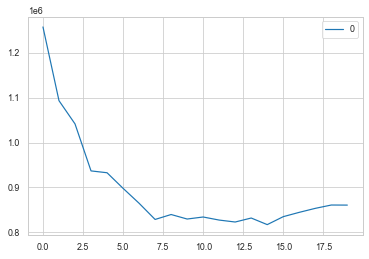

In [68]:
pd.DataFrame(rmse_val).plot()

In [69]:
knn_model = KNeighborsRegressor(n_neighbors=15)

In [71]:
knn_model.fit(features_train_sc, target_train)

KNeighborsRegressor(n_neighbors=15)

Model Performance
r2: 0.4364
Mean Absolute Error: 500759.82
Mean Square Error: 667943731315.77
Mean Average Percentage Error: 153.15


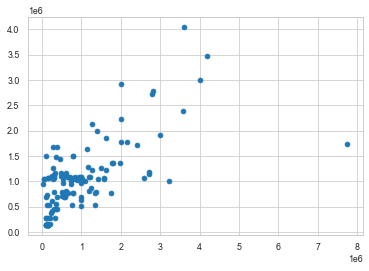

In [74]:
evaluate(knn_model, features_test_sc, target_test)

In [77]:
importance = pricing_model.feature_importances_

In [79]:
importance = pd.DataFrame(importance)
importance

,0
0,0.342854
1,0.442219
2,0.021617
3,0.002936
4,0.008283
...,...
76,0.000026
77,0.000000
78,0.002448
79,0.000014


In [80]:
importance.rename(columns={0:'Value'}, inplace=True)

In [81]:
importance

,Value
0,0.342854
1,0.442219
2,0.021617
3,0.002936
4,0.008283
...,...
76,0.000026
77,0.000000
78,0.002448
79,0.000014


In [82]:
importance['Feature_Name'] = features.columns.values

In [83]:
importance= importance.sort_values(by='Value' ,ascending=False)

In [87]:
importance_rank = importance.head(5)
importance_rank

,Value,Feature_Name
1,0.442219,Manhours
0,0.342854,Floor_Area
10,0.051921,Industry_Financial
2,0.021617,Duration
42,0.017184,Project_Type_Convention Center


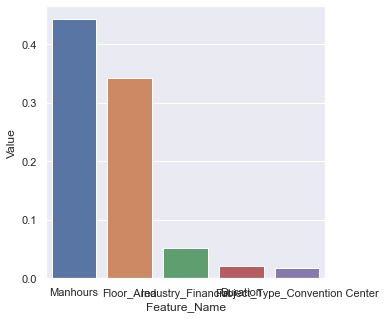

In [88]:
sns.barplot(x='Feature_Name', y = 'Value', data=importance_rank)
sns.set(rc={'figure.figsize':(5,5)})

In [ ]:
importance